In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

# II. Data Analysis
Once we have our data, one of the first and most important steps is to understand what the data is like. This is especially important if you're collecting your own data and have to determine what data is useful.

In [2]:
df = pd.read_csv('diabetes_india.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Calling `df.describe()` shows a summary of information about each column in our table. We can then visualize each column using a histogram and boxplot.

**TODO:** Write questions about the dataset

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
def prepare_dataset(df):
    """
    Separates the dataset into X and y
    """
    X = df.loc[:, df.columns != 'Outcome']
    y = df.Outcome
    return X, y

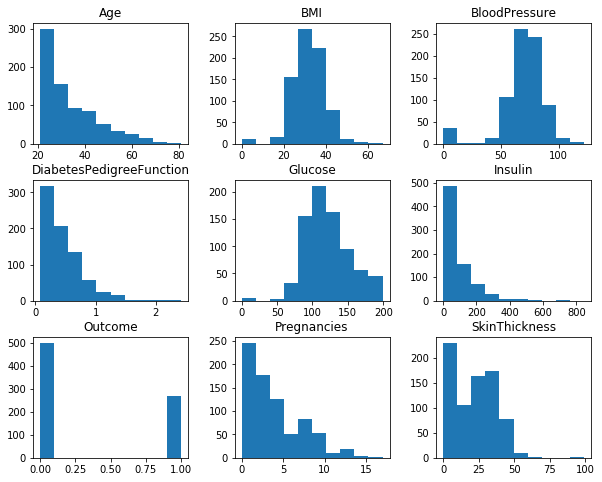

In [32]:
_ = df.hist(figsize=(10,8), grid=False)

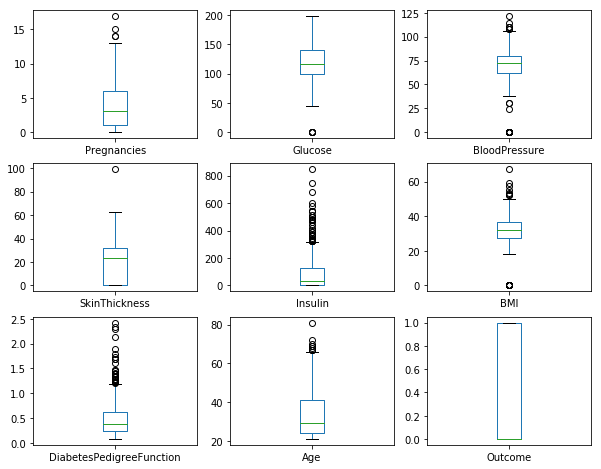

In [33]:
_ = df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8), sort_columns=True)

# Which features are the most useful?
Our machine learning classifier is going to use these features to predict whether or not a patient has diabetes. As the desginers of the classifier, we need to have a general idea of how the classifier works. One way to do this is to look at the **usefulness** of each feature and decide whether this makes sense from a clinical perspective.

We'll use a [Chi-Squared Test](https://en.wikipedia.org/wiki/Chi-squared_test) to see which features are most strongly associated with one class or another (positive or negative).

First, we'll separate our dataset into two separate parts:
- **X** - these are the features that we'll use to look for patterns. These are also called *independent variables*

- **y** - these are the labels that tell us whether or not a patient has diabetes. This is also called the *dependent variable*

In [35]:
X, y = prepare_dataset(df)

In [36]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [42]:
# Run the test on our data
chi2_scores, p_values = chi2(X, y)

In [43]:
feature_names = X.columns

In [44]:
for (feat_name, score) in zip(feature_names, chi2_scores):
    print(feat_name, score)

Pregnancies 111.51969063588255
Glucose 1411.887040644141
BloodPressure 17.605373215320718
SkinThickness 53.10803983632434
Insulin 2175.5652729220137
BMI 127.669343331037
DiabetesPedigreeFunction 5.392681546971445
Age 181.30368904430023


Now we'll sort our features by the results of our chi2 test and then visualize them to compare how useful each feature is

In [45]:
sorted_feature_name_scores = sorted(zip(feature_names, chi2_scores), key=lambda x:x[1], reverse=True)

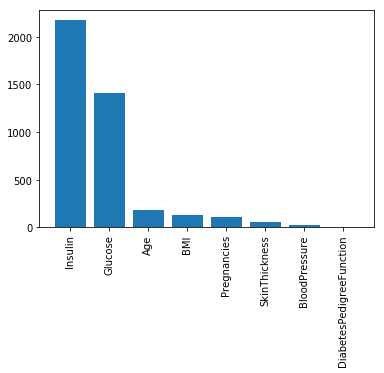

In [48]:
fig, ax = plt.subplots()
feat_names, feat_scores = zip(*sorted_feature_name_scores)
n = len(feat_names)
x_plot = range(n)
ax.bar(x_plot, feat_scores)

ax.set_xticks(x_plot)
_ = ax.set_xticklabels(feat_names, rotation='90')

**TODO**: Ask questions that invite the students to analyze the usefulness of the features, decide whether they make the most sense

**TODO Maybe**: Look at some of the more useful features, visualize and compare the values between positive and negative patients

# Up Next
Now that we understand what our dataset looks like and have a better understanding of our task, we can clean up our data, train the machine learning algorithms, and evaluate their performance.

[III. Machine Learning Classification](III_MachineLearningClassification.ipynb)